# Assignment 1 Yin Yumeng E0227600

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('results.csv')
method_cate=sorted_method = sorted(set(df['method']), key=lambda x: int(x.replace("Method","")))
df['method'] = pd.Categorical(df['method'], method_cate)
df = df.sort_values(by=['method'])

# Question 1 scatter

The question is to show the superiority of a method in terms of Average quality and number of changes in the quality for different buffer size.
For the question I draw separate plot for each buffer size.
For each one, average quality and change value is calculated under each method. After that Scatter chart is plot to show the superiority.
From the plot, we can see that under buffer size method3 have smallest change in quality and Method5, Method6 and Method4 have high quality.
Under buffer size 30/60, Method3 have smallest change in quality and Method6 and Method5 have high quality.
Under buffer size 120, Method3 have smallest change in quality and Method4, Method5 and Method6 have high quality.


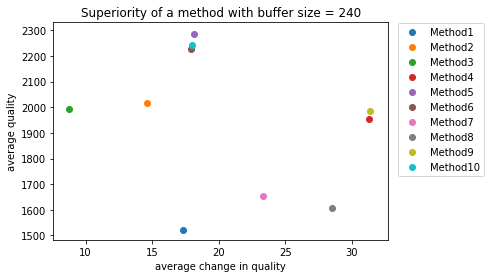

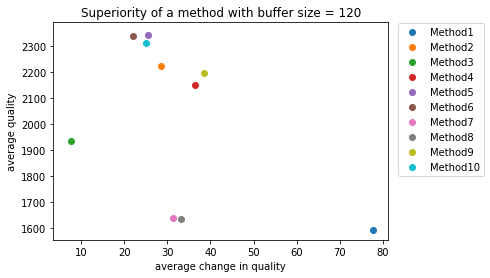

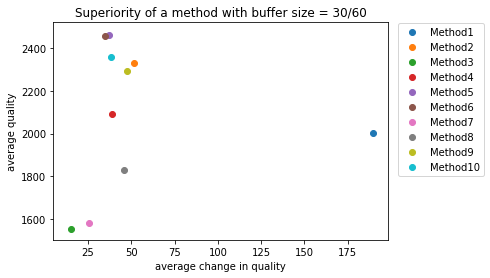

In [2]:
for buf in set(df['bufSize']):
    df_filtered = df[df['bufSize'] == buf]
    df_filtered = df_filtered.groupby('method', as_index=False)['quality','change'].mean()
    for method in method_cate:
        df_method = df_filtered[df_filtered['method'] == method]
        plt.scatter(df_method['change'], 
                    df_method['quality'], 
                    label=method)
    plt.ylabel('average quality')
    plt.xlabel('average change in quality')
    plt.legend(loc=1, bbox_to_anchor = (1.3, 1.02))
    plt.gca().set_title("Superiority of a method with buffer size = " + buf)
    plt.show() 

# Question 2 Barplot

For this question, the average value of QOE of specific buffer size and specific method is calculated first.
You can compare the qoe of different buffer size for specific method can be achieved by comparing the lengh of bar of specific buffer configuration.
To compare between different method, we can compare the total length of the qoe value.

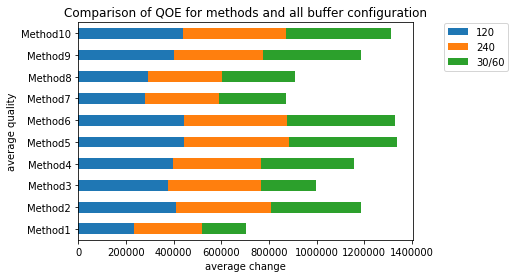

In [55]:
df_filtered = df.groupby(['method', 'bufSize'], as_index=False)['qoe'].mean()
df_filtered = df_filtered.pivot(index='method', columns='bufSize', values='qoe')
df_filtered.plot.barh(stacked=True)
plt.ylabel('average quality')
plt.xlabel('average change')
plt.legend(loc=1, bbox_to_anchor = (1.3, 1.02))
plt.gca().set_title("Comparison of QOE for methods and all buffer configuration")
plt.show() 

# Question 3

To show correlation between inefficiency and quality for all methods in all buffer configurations. 
I use two kinds of chart to show the correlation.

In [4]:
bufset = set(df['bufSize'])
methodset= set(df['method'])
df_filtered = df[['bufSize','method','inefficiency','quality']]
cor_list = pd.DataFrame(np.zeros([len(bufset), len(methodset)]), index = bufset, columns = method_cate)

## 3.1 heatmap
First the correlation value between inefficiency and quality for all methods in all buffer configurations is first calculated by using of function corr.
From the plot, the blue color means that under that method and configuration the correlation is negative. The red color means that the corrlation is positive. The darker the color, the higher the correlation.

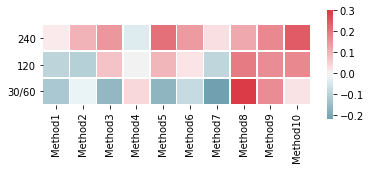

In [5]:
for buf in set(df['bufSize']):
    for method in sorted_method:
        df_method_buf = df_filtered[(df_filtered['bufSize'] == buf) & (df_filtered['method'] == method)]
        cor_list.set_value(buf, method, df_method_buf['inefficiency'].corr(df_method_buf['quality']))
        
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor_list,  vmax=.3, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## 3.2 correlation 

For each method, I plot a picture which shows the correlation of inefficiency and quality using a linear regression model fit line.
From the chart, the larger the true value of gradient of the line, the larger the correlation. For example in Method 8 the green line have largest true value gradient, which means under the 30/60 buffer size the correlation of inefficiency and quality is positive and correlation is most relevant compared to other two buffer configuration.

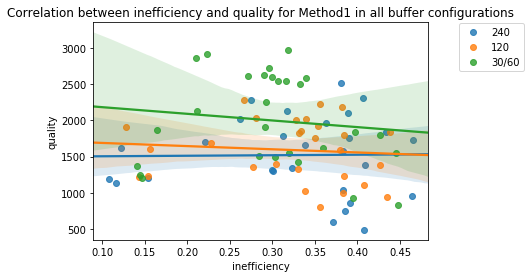

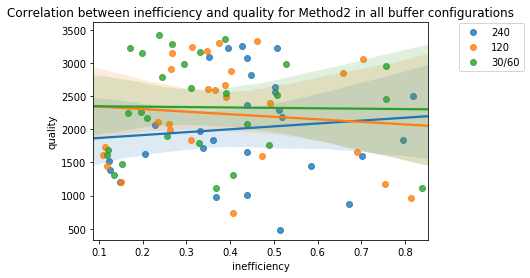

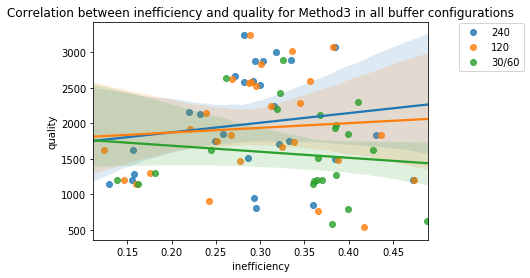

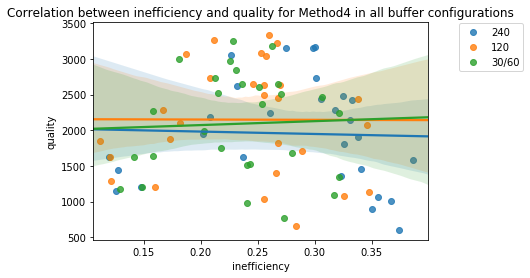

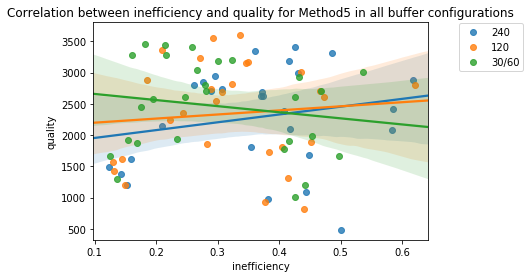

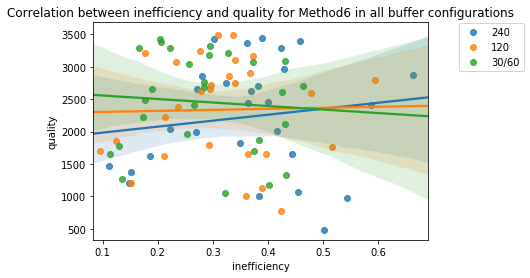

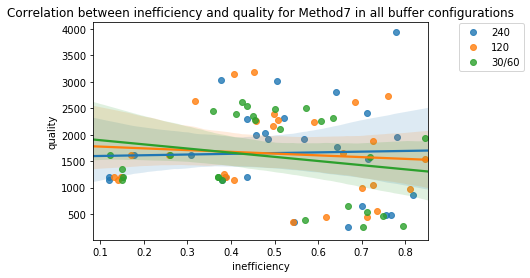

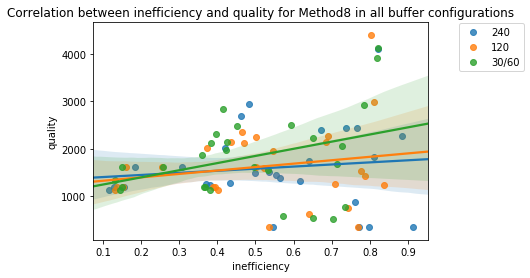

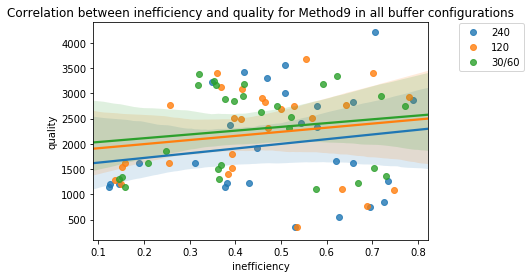

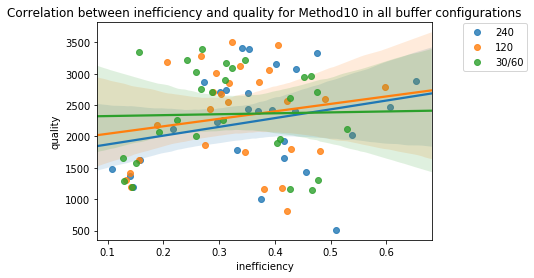

In [6]:
for method in method_cate:
    for buf in set(df['bufSize']):
        df_method_buf = df_filtered[(df_filtered['bufSize'] == buf) & (df_filtered['method'] == method)]
        sns.regplot(x='inefficiency', y='quality', data=df_method_buf, label=buf)
    plt.ylabel('quality')
    plt.xlabel('inefficiency')
    plt.legend(loc=1, bbox_to_anchor = (1.3, 1.02))
    plt.gca().set_title("Correlation between inefficiency and quality for "+method+" in all buffer configurations")
    plt.show() 
    




# Question 4

To show the methods which have the minimum number of stalls for video V7 under all network profiles, first for each profile I calculate the sum of number of stalls under each method.
All method have zero number of stalls besides Method1, Method3 and Methdod4.

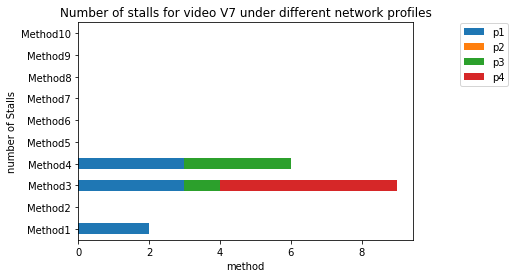

In [65]:
df_filtered = df[df['sample'] == 'v7'][['profile', 'numStall', 'method']]
df_filtered = df_filtered.groupby(['method','profile'], as_index=False)['numStall'].sum()
df_filtered = df_filtered.pivot(index='method', columns='profile', values='numStall')
df_filtered.plot.barh(stacked=True)
plt.ylabel('number of Stalls')
plt.xlabel('method')
plt.legend(loc=1, bbox_to_anchor = (1.3, 1.02))
plt.gca().set_title("Number of stalls for video V7 under different network profiles")
plt.show()